In [1]:
import numpy as np
import matplotlib.pyplot as plt

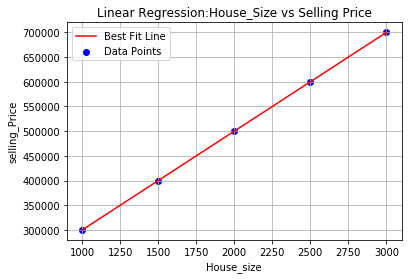

Mean Square Error: 0.0


In [2]:
#Data
house_sizes=np.array([1000,1500,2000,2500,3000])
selling_prices=np.array([300000,400000,500000,600000,700000])

#step-1:Calculate the mean of x and y
mean_house_size=np.mean(house_sizes)
mean_selling_price=np.mean(selling_prices)

#step-2:Calculate the slope m
numerator=np.sum((house_sizes-mean_house_size)*(selling_prices-mean_selling_price))
denominator=np.sum((house_sizes-mean_house_size)**2)
slope_m=numerator/denominator

#step-3:Calculate The y-intercept(c)
intercept_c=mean_selling_price-slope_m*mean_house_size

#step-4:Predict the selling price for each
house_predicted_prices=slope_m*house_sizes+intercept_c

#step-5:plot the Datapoints and the best fit line
plt.scatter(house_sizes,selling_prices,color='blue',label='Data Points')
plt.plot(house_sizes, slope_m * house_sizes+intercept_c,color='red',label='Best Fit Line')
plt.xlabel('House_size')
plt.ylabel('selling_Price')
plt.title('Linear Regression:House_Size vs Selling Price')
plt.legend()
plt.grid(True)
plt.show()

#step-6:Caluclate the Mean Square Error
MSE=np.mean((selling_prices-house_predicted_prices)**2)
print('Mean Square Error:',MSE)

In [3]:
import pandas as pd
data=pd.read_csv('Z:\\3rd Year\\3-2\ML\\Files\\salary_data.csv')
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


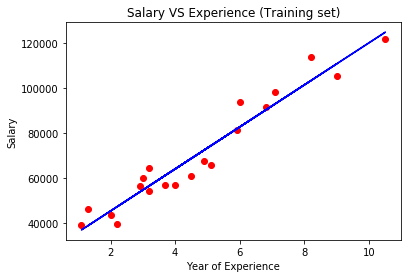

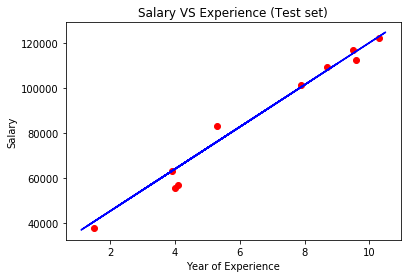

In [ ]:
#Batch Gradient Descent Approach
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('Z:\\3rd Year\\3-2\ML\\Files\\salary_data.csv')
X=data.iloc[:, :-1].values
y=data.iloc[:,1].values

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

a = plt
a.scatter(X_train, y_train, color='red')
a.plot(X_train, regressor.predict(X_train), color='blue')
a.title('Salary VS Experience (Training set)')
a.xlabel('Year of Experience')
a.ylabel('Salary')
a.show()


b = plt
b.scatter(X_test, y_test, color='red')
b.plot(X_train, regressor.predict(X_train), color='blue')
b.title('Salary VS Experience (Test set)')
b.xlabel('Year of Experience')
b.ylabel('Salary')
b.show()

y_pred = regressor.predict(X_test)

plt.plot(X,y,'bo')
m=0
b=0
Y=lambda x:m*x+b

def plot_line(Y,data_points):
    x_values=[i for i in range(int(min(data_points))-1,int(max(data_points))+2)]
    y_values=[Y(x) for x in x_values]
    plt.plot(x_values,y_values,'r')
    plot_line(Y,X)        
    plt.plot(X,y,'bo')

learn=.01
def summation(Y,X,y):
     total_1=0;
     total_2=0;
     for i in range(1,len(X)):
         total_1+=Y(X[i])-y[i]
         total_2+=(Y(X[i])-y[i])+X[i]
     return total_1/len(X),total_2/len(y)

for i in range(50):
    s1,s2=summation(Y,X,y)
    m=m-learn*s2
    b=b-learn*s1
    plot_line(Y,X)
    plt.plot(X,y,"bo")


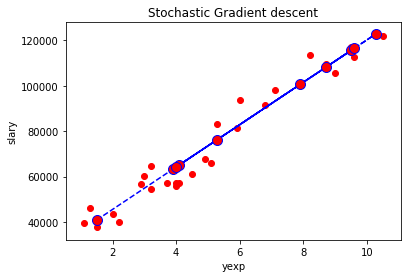

In [2]:
#Stochastic gradient descent approach 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('Z:\\3rd Year\\3-2\ML\\Files\\salary_data.csv')
X=data.iloc[:, :-1].values
y=data.iloc[:,1].values

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=6000,penalty=None,eta0=0.1,alpha=0.01)
X_train=X_train.reshape(-1,1)
sgd.fit(X_train,y_train)
X_test=X_test.reshape(-1,1)
y_pred=sgd.predict(X_test)
plt.plot(X_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(X,y,marker='o',color='red')
plt.xlabel("yexp")
plt.ylabel("slary")
plt.title('Stochastic Gradient descent')
plt.show()
